In [1]:
'''ライブラリの準備'''
import pickle
from matplotlib import pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pickle

In [3]:
with open('/content/drive/MyDrive/Bachelor_thisis/dataset/pic.bin', 'rb') as p:
    data = pickle.load(p)

train = data[0]
test = data[1]

train_set = train[0]
train_eval = train[1]

test_set = test[0]
test_eval = test[1]

In [4]:
# 使用するDeviceの指定
# GPUが使用できる方はGPU, 使用できない方はCPUを使用するように設定
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Tensorに変換
x_train = torch.Tensor(train_set)
y_train = torch.Tensor(train_eval)
x_test = torch.Tensor(test_set)
y_test = torch.Tensor(test_eval)
# データセッを作成
ds_train = TensorDataset(x_train, y_train)
# DataLoaderを作成
train_loader = DataLoader(ds_train, batch_size=1, shuffle=True)

<ipython-input-4-a5925ea14c15>:5: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:230.)
  x_train = torch.Tensor(train_set)


In [5]:
'''モデルの定義'''
class Net(nn.Module):
    def __init__(self, n_vis=26, n_hid=64, n_out=81, device='cpu'):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(n_vis, n_hid)
        self.fc2 = nn.Linear(n_hid, n_out)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.softmax(self.fc2(x))
        return x
net = Net()

In [6]:
'''最適化手法の定義'''
criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=0.0001)

'''学習'''
losses = []
for epoch in range(1000):
    total_loss = 0
    for train_x, train_y in train_loader:
        optimizer.zero_grad()
        loss = criterion( net(train_x), train_y )
        loss.backward()
        optimizer.step()
        total_loss += loss.data
    losses.append(total_loss)
    print(epoch+1, ':', 'loss = ', total_loss)

1 : loss =  tensor(1.1735)
2 : loss =  tensor(0.8135)
3 : loss =  tensor(0.7641)
4 : loss =  tensor(0.7409)
5 : loss =  tensor(0.7221)
6 : loss =  tensor(0.7045)
7 : loss =  tensor(0.6903)
8 : loss =  tensor(0.6761)
9 : loss =  tensor(0.6630)
10 : loss =  tensor(0.6510)
11 : loss =  tensor(0.6400)
12 : loss =  tensor(0.6295)
13 : loss =  tensor(0.6192)
14 : loss =  tensor(0.6094)
15 : loss =  tensor(0.5997)
16 : loss =  tensor(0.5903)
17 : loss =  tensor(0.5804)
18 : loss =  tensor(0.5715)
19 : loss =  tensor(0.5617)
20 : loss =  tensor(0.5528)
21 : loss =  tensor(0.5432)
22 : loss =  tensor(0.5336)
23 : loss =  tensor(0.5239)
24 : loss =  tensor(0.5142)
25 : loss =  tensor(0.5048)
26 : loss =  tensor(0.4953)
27 : loss =  tensor(0.4858)
28 : loss =  tensor(0.4766)
29 : loss =  tensor(0.4673)
30 : loss =  tensor(0.4580)
31 : loss =  tensor(0.4494)
32 : loss =  tensor(0.4405)
33 : loss =  tensor(0.4314)
34 : loss =  tensor(0.4227)
35 : loss =  tensor(0.4141)
36 : loss =  tensor(0.4059)
3

In [7]:
## save model

model_path = '/content/drive/MyDrive/Bachelor_thisis/NN/nn1_apply.pt'
torch.save(net, model_path)

In [8]:
epoch_num = []
for i in range(epoch+1):
    epoch_num.append(i+1)

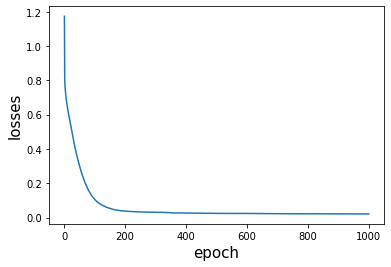

In [9]:
fig, ax = plt.subplots()
ax.plot(epoch_num, losses)
ax.set_xlabel('epoch')
ax.set_ylabel('losses')
ax.set_xlabel('epoch', fontsize=15)
ax.set_ylabel('losses', fontsize=15)
plt.tick_params(axis='y', which='major', labelsize=10)
plt.tick_params(axis='x', which='major', labelsize=10)

In [10]:
net = net.eval()

In [11]:
pred = net(x_test)

In [12]:
max_diff_list = []

In [13]:
for i in range(len(y_test)):
    teach_data = y_test[i].detach().cpu().numpy()
    pred_data = pred[i].detach().cpu().numpy()

    data_diff = np.round(np.abs(teach_data - pred_data), 2)
    max_diff = np.max(data_diff)
    max_diff_list.append(max_diff)

In [14]:
max_diff_array = np.array(max_diff_list)
total_max_diff = np.max(max_diff_array)
max_idx = np.argmax(max_diff_array)

print('total_max_diff = ', total_max_diff)
print('max_idx = ', max_idx)

total_max_diff =  0.17
max_idx =  66


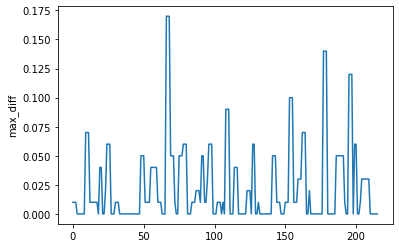

In [15]:
x = np.arange(0, len(max_diff_array))
y = max_diff_array

plt.ylabel("max_diff")

plt.plot(x, y)
plt.show()

In [16]:
print(max_diff_list)

[0.01, 0.01, 0.01, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.07, 0.07, 0.07, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.0, 0.04, 0.04, 0.0, 0.0, 0.02, 0.06, 0.06, 0.06, 0.0, 0.0, 0.0, 0.01, 0.01, 0.01, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05, 0.05, 0.05, 0.01, 0.01, 0.01, 0.01, 0.04, 0.04, 0.04, 0.04, 0.04, 0.01, 0.01, 0.01, 0.0, 0.0, 0.0, 0.17, 0.17, 0.17, 0.05, 0.05, 0.05, 0.01, 0.0, 0.0, 0.05, 0.05, 0.05, 0.06, 0.06, 0.06, 0.0, 0.0, 0.0, 0.01, 0.01, 0.01, 0.02, 0.02, 0.02, 0.01, 0.05, 0.05, 0.01, 0.01, 0.03, 0.06, 0.06, 0.06, 0.0, 0.0, 0.0, 0.01, 0.01, 0.01, 0.0, 0.01, 0.0, 0.09, 0.09, 0.09, 0.0, 0.0, 0.0, 0.04, 0.04, 0.04, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.02, 0.02, 0.02, 0.0, 0.06, 0.06, 0.0, 0.0, 0.01, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05, 0.05, 0.05, 0.01, 0.01, 0.01, 0.0, 0.0, 0.0, 0.01, 0.01, 0.01, 0.1, 0.1, 0.1, 0.01, 0.01, 0.01, 0.03, 0.03, 0.03, 0.07, 0.07, 0.07, 0.0, 0.0, 0.02, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.14, 0.14, 0.1

In [17]:
teach_data = y_test[177].detach().cpu().numpy()
pred_data = pred[177].detach().cpu().numpy()

In [18]:
x1_axis = [i for i in range(len(y_train[0]+1))]
x2_axis = [i+0.5 for i in range(len(pred[0] + 1))]

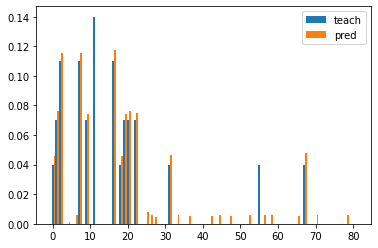

In [19]:
plt.bar(x1_axis, teach_data, width=0.5, label='teach')
plt.bar(x2_axis, pred_data, width=0.5, label='pred')

plt.legend()
plt.show()